In [19]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [20]:
# Webscrapping Wikipedia table to get the IBEX 35 components
page = requests.get("https://es.wikipedia.org/wiki/IBEX_35")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table', class_="wikitable sortable")

In [21]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Ticker,Empresa,Sede,Entrada,Sector[29]​,ISIN,Ponderación (Sep. 2022)
0,ANA,Acciona,Alcobendas,2015,Construcción,ES0125220311,112
1,ANE,Acciona Energía,Alcobendas,2022,Energías renovables,ES0105563003,36
2,ACX,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,49
3,ACS,ACS,Madrid,1998,Construcción,ES0167050915,203
4,AENA,Aena,Madrid,2015,Transporte y distribución,ES0105046009,351
5,AMS,Amadeus IT Group,Madrid,2011,Electrónica y software,ES0109067019,519
6,MTS,ArcelorMittal,Ciudad de Luxemburgo,2009,"Mineral, metales y transformación",LU1598757687,76
7,SAB,Banco Sabadell,Alicante,2004,Bancos y cajas de ahorro,ES0113860A34,141
8,SAN,Banco Santander,Santander,1992,Bancos y cajas de ahorro,ES0113900J37,1201
9,BKT,Bankinter,Madrid,1992,Bancos y cajas de ahorro,ES0113679I37,115


In [22]:
# Add .MC to all Tickers to use them on Yahoo Finance
wiki['Ticker'] = wiki['Ticker'].apply(lambda x: x+'.MC')
wiki.head()

,Ticker,Empresa,Sede,Entrada,Sector[29]​,ISIN,Ponderación (Sep. 2022)
0,ANA.MC,Acciona,Alcobendas,2015,Construcción,ES0125220311,112
1,ANE.MC,Acciona Energía,Alcobendas,2022,Energías renovables,ES0105563003,36
2,ACX.MC,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,49
3,ACS.MC,ACS,Madrid,1998,Construcción,ES0167050915,203
4,AENA.MC,Aena,Madrid,2015,Transporte y distribución,ES0105046009,351


In [23]:
# Get the data for the stock ^IBEX
ibex35_list = list(wiki['Ticker'])
ibex35_list.append('^IBEX')

TypeError: 'list' object is not callable

In [24]:
# Save all the historical data
for stock in ibex35_list:
    data = yf.download(stock, progress=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

num_files = len(os.listdir("../input")) 
print(f"{num_files} files downloaded")

36 files downloaded


In [25]:
# Configuration of different parameters of the notebook
ticker = '^IBEX'
year = '2024'

In [26]:
# Check DataFrame
stock_ibex = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_ibex.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-07-12,2826.800049,2826.800049,2814.600098,2826.399902,2826.396973,0
1993-07-13,2826.399902,2843.699951,2820.899902,2843.399902,2843.396973,0
1993-07-14,2845.399902,2858.399902,2845.399902,2851.100098,2851.097168,0
1993-07-15,2848.699951,2848.699951,2835.000000,2843.699951,2843.697021,0
1993-07-16,2843.699951,2848.000000,2818.800049,2830.500000,2830.497070,0
1993-07-19,2825.199951,2825.199951,2817.399902,2822.199951,2822.197021,0
1993-07-20,2829.500000,2840.500000,2829.500000,2840.000000,2839.997070,0
1993-07-21,2832.300049,2832.300049,2819.000000,2830.500000,2830.497070,0
1993-07-22,2830.500000,2849.899902,2814.100098,2838.899902,2838.896973,0


In [27]:
# Check DataFrame tail
stock_ibex.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-09,10159.000000,10181.900391,9994.000000,10060.299805,10060.299805,157192400
2024-01-10,10053.900391,10079.799805,10017.799805,10067.099609,10067.099609,136822100
2024-01-11,10112.700195,10151.799805,10004.900391,10004.900391,10004.900391,134217300
2024-01-12,10024.799805,10134.700195,10023.799805,10094.799805,10094.799805,134251900
2024-01-15,10118.900391,10135.299805,10048.599609,10076.900391,10076.900391,87931100
2024-01-16,10022.700195,10024.299805,9955.000000,9994.099609,9994.099609,138279400
2024-01-17,9916.799805,9916.799805,9826.599609,9867.799805,9867.799805,133882600
2024-01-18,9876.799805,9901.500000,9798.799805,9880.299805,9880.299805,134134100
2024-01-19,9915.799805,9931.000000,9823.700195,9858.299805,9858.299805,146590900


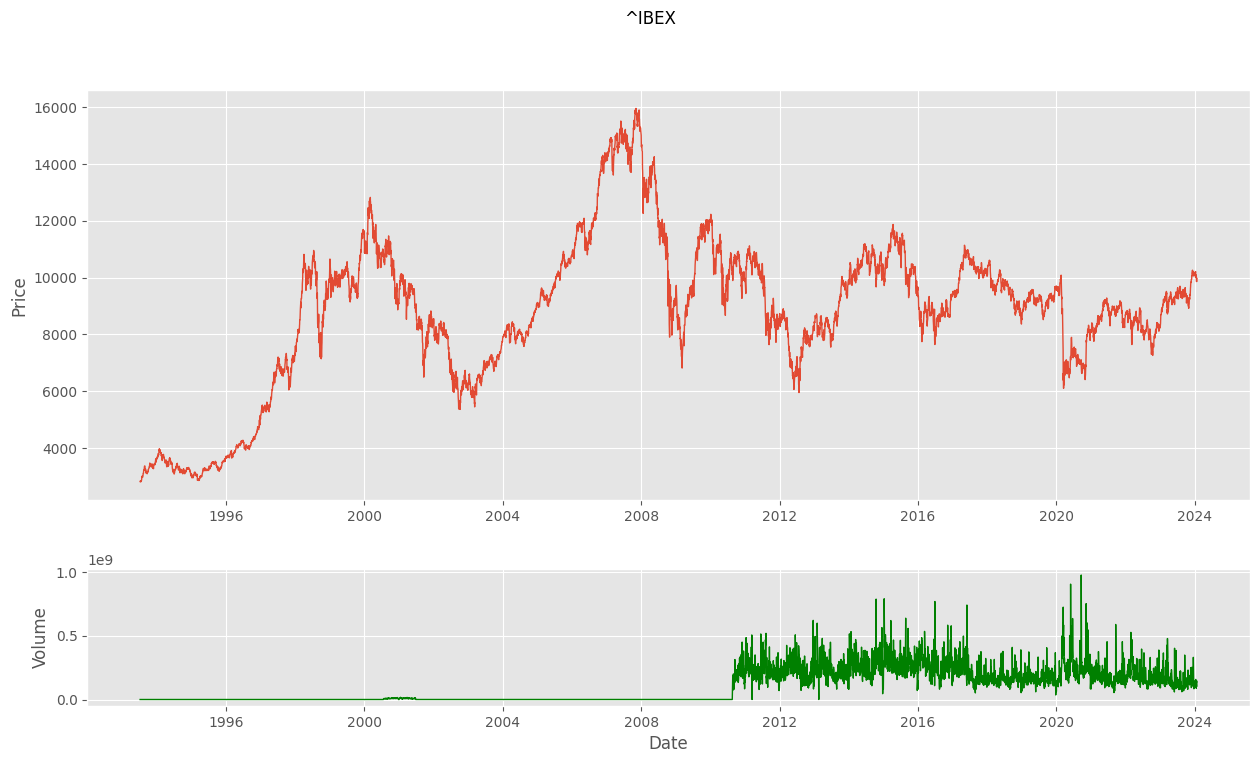

In [28]:
# Plot the adjusted close price of the ^IBEX
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ibex['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ibex['Volume'],linewidth=1,color='g')

plt.show()

In [29]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ibex.index,y=stock_ibex['Adj Close'],mode="lines",name='IBEX35'),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ibex.index,y=stock_ibex['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [30]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_ibex['MMA20'] = stock_ibex['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_ibex["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_ibex['BB_Upper'] = indicator_bb.bollinger_hband()
stock_ibex['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_ibex["Adj Close"].loc[year], window=14)

# RSI
stock_ibex['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_ibex['Daily_Return'] = daily_return(stock_ibex["Adj Close"].loc[year])

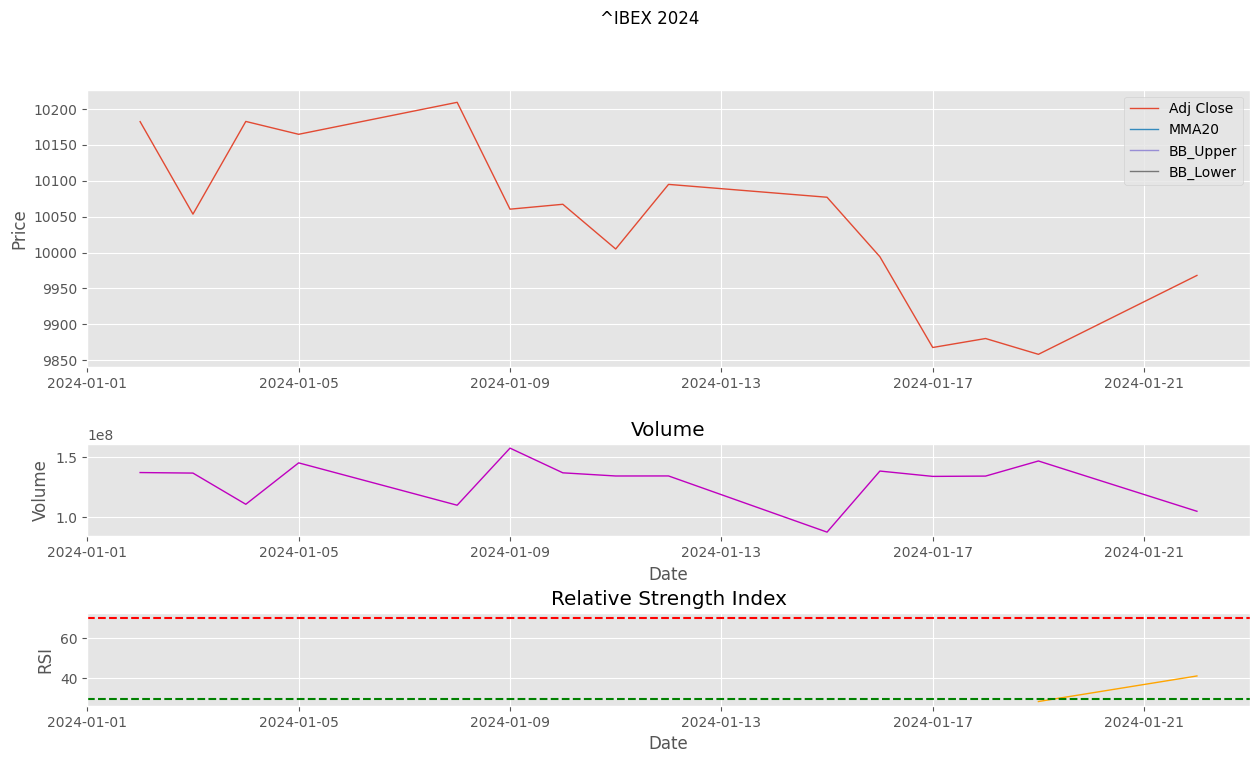

In [31]:
# Plot the adjusted close price of the ^IBEX for year
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ibex['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_ibex['MMA20'],linewidth=1) 
axs[0].plot(stock_ibex['BB_Upper'],linewidth=1)
axs[0].plot(stock_ibex['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_ibex['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_ibex['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_ibex['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [32]:
# Plot the adjusted close price of the ^IBEX for year
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ibex['Adj Close'].loc[year].index,y=stock_ibex['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ibex['BB_Lower'].loc[year].index,y=stock_ibex['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ibex['BB_Upper'].loc[year].index,y=stock_ibex['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ibex['MMA20'].loc[year].index,y=stock_ibex['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_ibex['Volume'].loc[year].index,y=stock_ibex['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_ibex['Volume'].loc[year].index,y=stock_ibex['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ibex['RSI'].loc[year].index,y=stock_ibex['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [33]:
stock_ibex.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,
2024-01-09,10159.000000,10181.900391,9994.000000,10060.299805,10060.299805,157192400,NaN,NaN,NaN,NaN,-1.456560
2024-01-10,10053.900391,10079.799805,10017.799805,10067.099609,10067.099609,136822100,NaN,NaN,NaN,NaN,0.067590
2024-01-11,10112.700195,10151.799805,10004.900391,10004.900391,10004.900391,134217300,NaN,NaN,NaN,NaN,-0.617846
2024-01-12,10024.799805,10134.700195,10023.799805,10094.799805,10094.799805,134251900,NaN,NaN,NaN,NaN,0.898554
2024-01-15,10118.900391,10135.299805,10048.599609,10076.900391,10076.900391,87931100,NaN,NaN,NaN,NaN,-0.177313
2024-01-16,10022.700195,10024.299805,9955.000000,9994.099609,9994.099609,138279400,NaN,NaN,NaN,NaN,-0.821689
2024-01-17,9916.799805,9916.799805,9826.599609,9867.799805,9867.799805,133882600,NaN,NaN,NaN,NaN,-1.263744
2024-01-18,9876.799805,9901.500000,9798.799805,9880.299805,9880.299805,134134100,NaN,NaN,NaN,NaN,0.126675
2024-01-19,9915.799805,9931.000000,9823.700195,9858.299805,9858.299805,146590900,NaN,NaN,NaN,28.578170,-0.222665


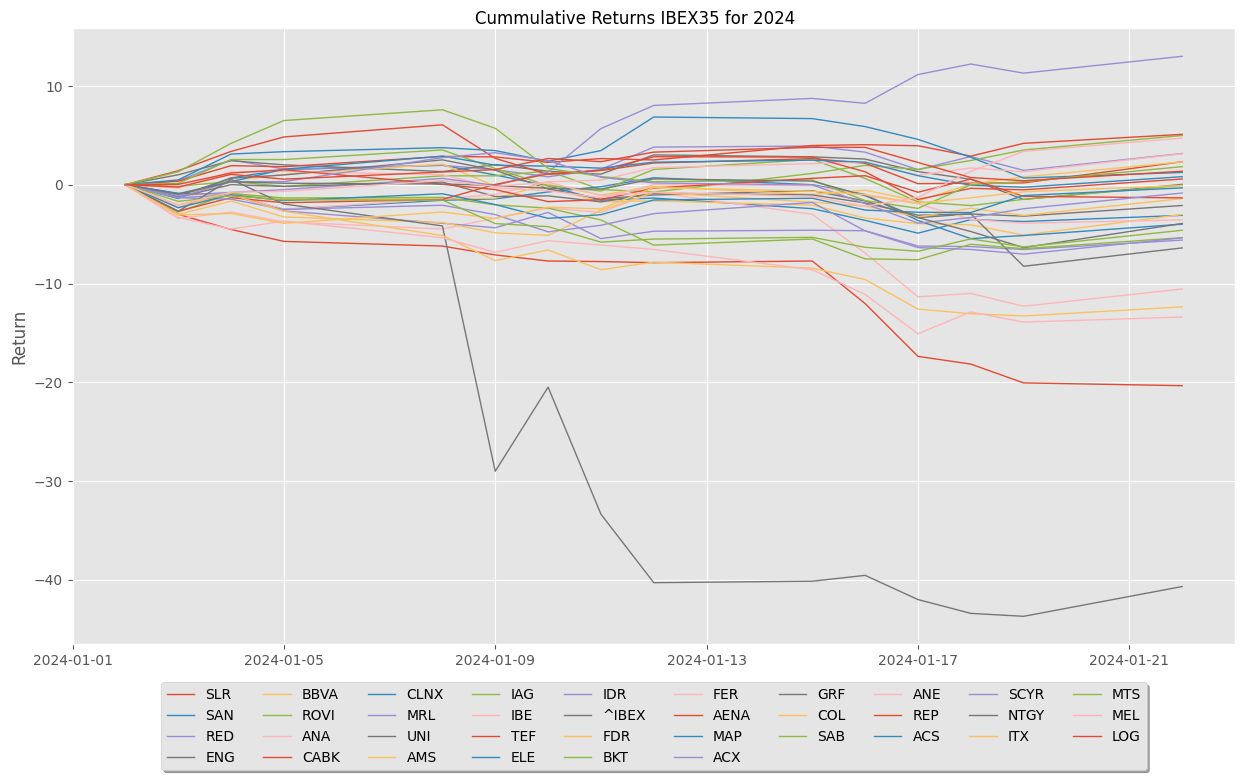

In [34]:
# Plot Cummulative Returns ^IBEX for year
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for filename in os.listdir("../input"):
    f = os.path.join("../input", filename)
    df = pd.read_csv(f,index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(filename.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [35]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for filename in os.listdir("../input"):
    f = os.path.join("../input", filename)
    df = pd.read_csv(f,index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=filename.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns IBEX35 for {year}")

fig.show()

In [36]:
# Create also table of cummulative returns
list = []

for filename in os.listdir("../input"):
    f = os.path.join("../input", filename)
    df = pd.read_csv(f,index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),filename.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum = wiki[['Ticker','Empresa']].merge(cum,on='Ticker')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


,Ticker,Empresa,Date,Cummulative_Return
0,IDR.MC,Indra Sistemas,2024-01-22,12.997159
1,TEF.MC,Telefónica,2024-01-22,5.099227
2,ROVI.MC,Laboratorios Rovi,2024-01-22,4.983659
3,MEL.MC,Meliá Hotels International,2024-01-22,4.725734
4,RED.MC,Red Eléctrica Corporación,2024-01-22,3.158937
5,FER.MC,Ferrovial,2024-01-22,3.130485
6,CABK.MC,CaixaBank,2024-01-22,2.326189
7,AMS.MC,Amadeus IT Group,2024-01-22,2.315202
8,SAB.MC,Banco Sabadell,2024-01-22,1.830866
9,LOG.MC,Logista,2024-01-22,1.367659
